# **Topic Modeling mit BERTopic**  
## *Eine sehr kurze Einführung*

## **1. Bibliotheken Importieren**  

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import re
from hdbscan import HDBSCAN
from sklearn.datasets import fetch_20newsgroups
import seaborn as sns
import matplotlib.pyplot as plt 
from IPython.display import display


## **2. Texte laden**  

In [2]:
docs = fetch_20newsgroups(subset='test',  remove=('headers', 'footers', 'quotes'))['data']
# this loads a subset of https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html#


### **3. BERTopic for Topic Modeling**  

In [3]:
# Configure CountVectorizer
vectorizer_model = CountVectorizer(lowercase=False, stop_words="english", token_pattern=r"(?u)\b\w+\b")

# Configure HDBSCAN for clustering
hdbscan_model = HDBSCAN(min_cluster_size=5, min_samples=8, metric='euclidean', cluster_selection_method='eom')

# Create BERTopic model
bertopic_model = BERTopic(
    language="english",
    #embedding_model="paraphrase-multilingual-MiniLM-L12-v2",
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model
)

# Apply BERTopic to extract topics from the documents
topics, probs = bertopic_model.fit_transform(docs)


## 4. Ergebnisse überprüfen und visualisieren

## Topic Overview Table


In [4]:
# Extract topic information from BERTopic
topic_info = bertopic_model.get_topic_info()

# Print structured table
display(topic_info.set_index("Topic")[:20])  # Only show first 20 topics in a table and set topic as index


,Count,Name,Representation,Representative_Docs
Topic,,,,
-1,2463,-1_I_The_know_Q,"[I, The, know, Q, dont, think, just, like, It,...",[Brian Ceccarelli wrote (that's me):\n\n\nKent...
0,711,0_0_game_1_2,"[0, game, 1, 2, 3, 4, team, games, 5, 25]",[Tim Belcher pitched a dandy three-hit shut-ou...
1,264,1_key_encryption_Clipper_government,"[key, encryption, Clipper, government, keys, c...",[\nDo not presume to tell me what I have and h...
2,228,2_cheek_BULLSHIT_Yep_consistently,"[cheek, BULLSHIT, Yep, consistently, Ken, Me, ...","[\nYep.\n, BULLSHIT ! ! !\n\n\n, \n \n ..."
3,162,3_Israel_ED_Arab_Jewish,"[Israel, ED, Arab, Jewish, Jews, Israeli, Arab...","[Elias Davidsson writes...\n\nED> dear pete,\n..."
4,141,4_X_window_echo_remote,"[X, window, echo, remote, xterm, error, shell,...",[From my own notes on this subject....\n\nMeth...
5,126,5_God_atheists_atheist_god,"[God, atheists, atheist, god, atheism, religio...",[Archive-name: atheism/resources\nAlt-atheism-...
6,110,6_data_available_3D_Graphics,"[data, available, 3D, Graphics, mail, CA, HIV,...",[------------- cut here -----------------\n \n...
7,93,7_Kinsey_sex_sexual_homosexual,"[Kinsey, sex, sexual, homosexual, gay, men, ho...",[(This is a continuation of an earlier post)\n...


In [57]:
bertopic_model.get_topic(100)

[('print', np.float64(0.13308924544284742)),
 ('printer', np.float64(0.0961281596332874)),
 ('file', np.float64(0.09334500688990885)),
 ('postscript', np.float64(0.08062127669300267)),
 ('Print', np.float64(0.07564484832682633)),
 ('drag', np.float64(0.05344730816688739)),
 ('Postscript', np.float64(0.04912305193341104)),
 ('Manager', np.float64(0.04764984529309942)),
 ('printing', np.float64(0.04603490247045885)),
 ('output', np.float64(0.03909652019806804))]

## Distance Map

This visualization places topics in a 2D space based on their semantic similarity.  


This helps us identify clusters of related topics.

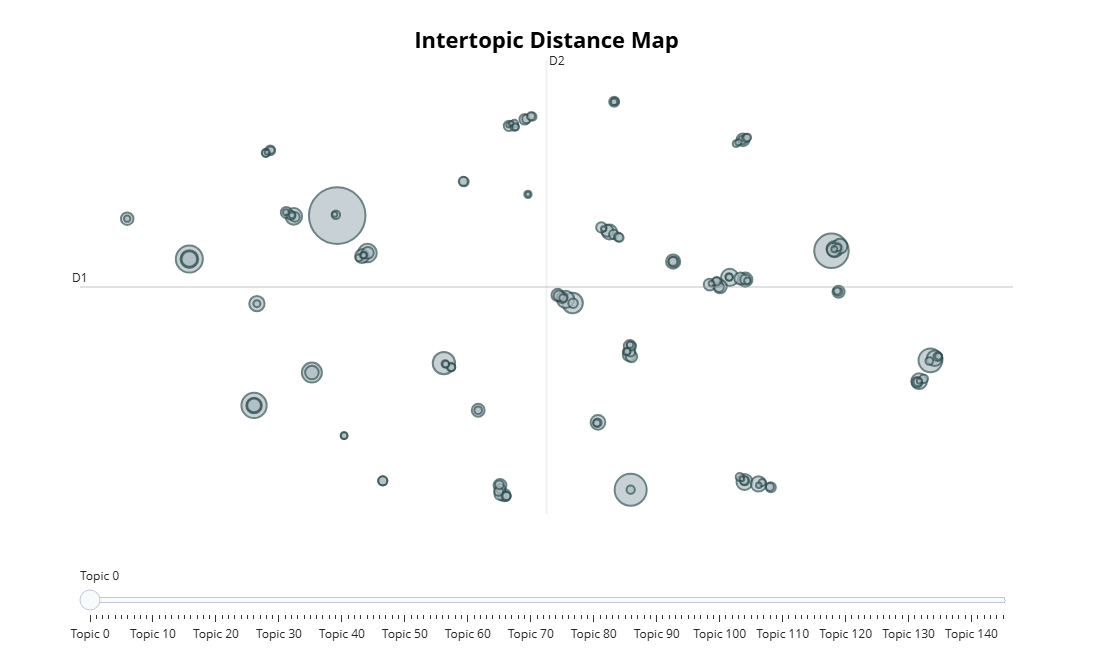

In [5]:
bertopic_model.visualize_topics()

## Topic Similarity Heatmap

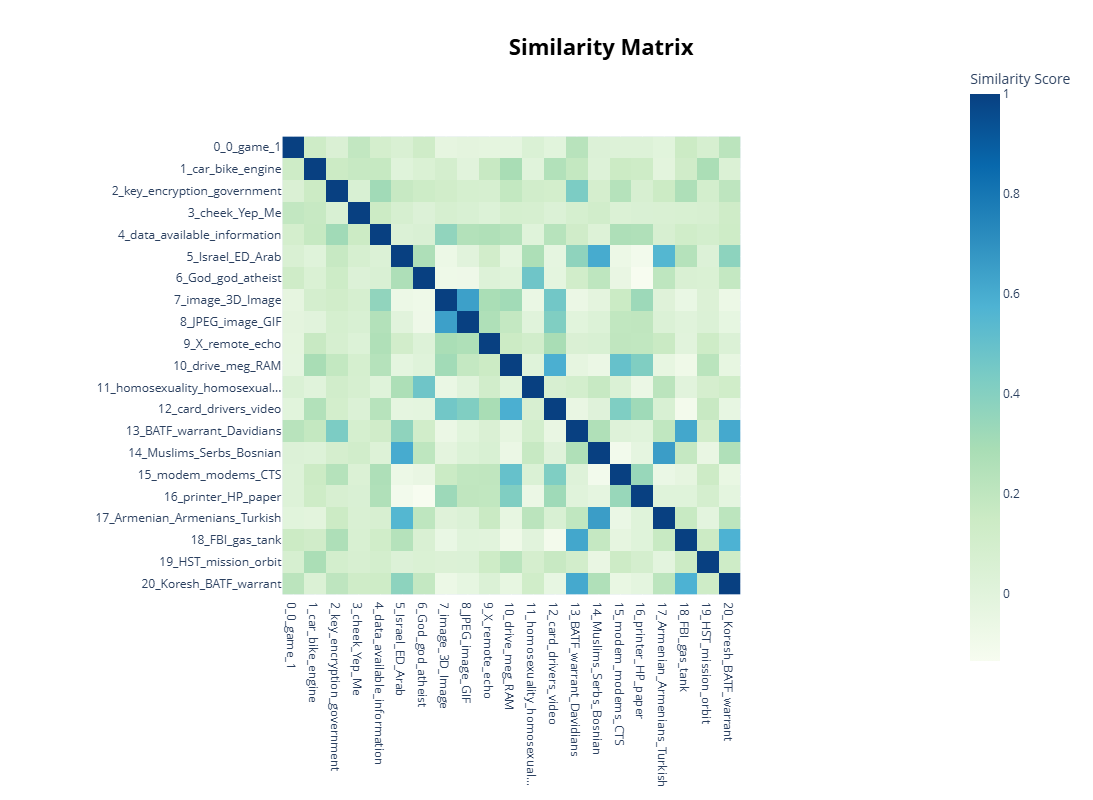

In [67]:
# Generate topic simlarity heatmap
similarity_matrix = bertopic_model.visualize_heatmap(topics=list(range(21)))

# Show heatmap
similarity_matrix.show()


## Top 20 Topics



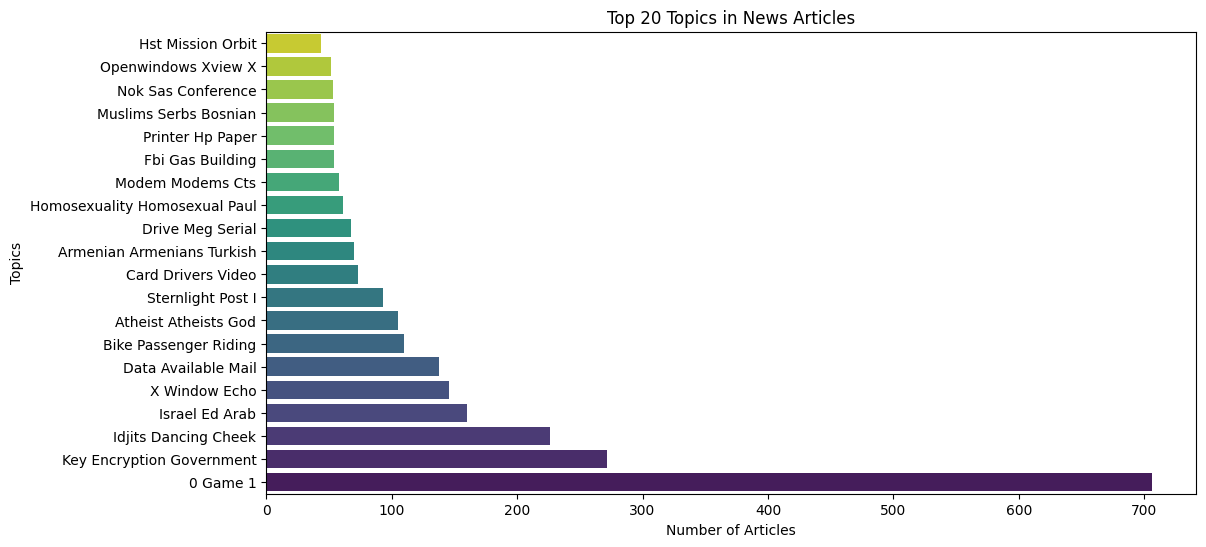

In [4]:
# Extract topic information from the BERTopic model
topic_info = bertopic_model.get_topic_info()

# Function to generate readable topic labels based on the most relevant keywords
def generate_topic_labels(topic_info):
    topic_labels = {}
    for i, row in topic_info.iterrows():
        if row["Topic"] == -1:
            topic_labels[row["Topic"]] = "Outlier / Miscellaneous"  # Cluster for ungrouped documents
        else:
            keywords = row["Name"].split("_")[1:4]  # Select first three keywords for labeling
            topic_labels[row["Topic"]] = " ".join(keywords).title()
    return topic_labels

# Apply generated labels to topics
topic_labels = generate_topic_labels(topic_info)
topic_info["Custom Name"] = topic_info["Topic"].map(topic_labels)

# Remove outliers (-1) and sort topics by size (most frequent topics first)
topic_sizes = topic_info[topic_info["Topic"] != -1]
topic_sizes = topic_sizes.sort_values("Count", ascending=False)

# Create the bar chart for the top 10 topics
plt.figure(figsize=(12, 6))
sns.barplot(y=topic_sizes["Custom Name"][:20], x=topic_sizes["Count"][:20], palette="viridis")
plt.xlabel("Number of Articles")
plt.ylabel("Topics")
plt.title("Top 20 Topics in News Articles")
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent topics at the top



plt.show()
